## Naive Bayes Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimentional datasets. Because of that, they end up being very useful as quick-and-dirty baseline for a classification problem.

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes' theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. 

In Bayesian classification, we are interested in finding the probablity of a label given some observed features, which can be written as c. In Bayes' theorem, this can be expressed as 

$P(L | features) = \dfrac{P(features | L) P(L)}{P(features)}$

And if we are trying to decide between two labels, say $L_1$ and $L_2$, then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$\dfrac{P(L_1 | features)}{P(L_2 | features)} = \dfrac{P(features | L_1) P(L_1)}{P(features | L_2) P(L_2)}$

All we need is to find some model that ccan compute P(features | L_i) for each label. Such model is called *generative model* because it specifies the hypothetical
random process that generates the data.

Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The word 'naive' simply means that we make very naive assumptions about the generative moddel for each label and we can find a rough approximation of the generative model for each cclass and then proceed with the Bayesian classification.



In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### Gaussian Naive Bayes

The asumption is that *data from each label is drawn from a simple Gaussian distribution*.

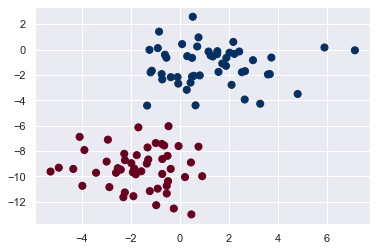

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu");

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, 14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [15]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Multinomial Naive Bayes
Features are assumed to be generateed from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts aamong a number of categories, and thus multinomial naive Bayes is most most appropriate for features that repreesent counts or cont rates

In [16]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [20]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [24]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.133125, 0.5, 'predicted label')

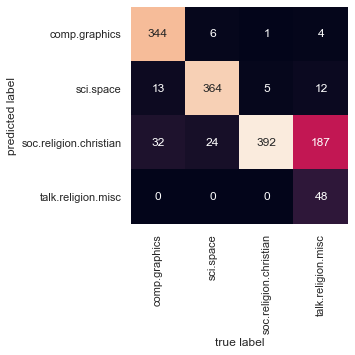

In [25]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [26]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [29]:
predict_category('sending a payload to the ISS')

'sci.space'

In [30]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [31]:
predict_category('determining the screen resolution')

'comp.graphics'

### When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:
- fast for training and prediction
- straightforward probabilistic prediction
- easily interpretable
- few tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial
baseline classification. Naive Bayes classifiers tend to perform especially well in one of the following situations:
- When naive assumption actually match the data
- Very well separated categories
- Very high dimentional data